In [1]:
from nli_16 import NLI_FullLinear_16M, NLI_PairsBasic_16M, NLI_Heads_16M, NLI_MiniHeads_16M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 16M

In [2]:
nli = NLI_FullLinear_16M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2248]      13,813,960
         LayerNorm-2                 [-1, 2248]           4,496
            Linear-3                 [-1, 1024]       2,302,976
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
            Linear-6                   [-1, 64]          32,832
            Linear-7                    [-1, 1]              65
Total params: 16,679,129
Trainable params: 16,679,129
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.05
Params size (MB): 63.63
Estimated Total Size (MB): 63.70
----------------------------------------------------------------


In [6]:
nli = NLI_PairsBasic_16M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 5, 1024]       2,098,176
            Linear-2              [-1, 5, 1024]       1,049,600
           Dropout-3              [-1, 5, 1024]               0
            Linear-4                 [-1, 2048]      10,487,808
         LayerNorm-5                 [-1, 2048]           4,096
            Linear-6                 [-1, 1024]       2,098,176
           Dropout-7                 [-1, 1024]               0
            Linear-8                  [-1, 512]         524,800
            Linear-9                  [-1, 256]         131,328
           Linear-10                   [-1, 64]          16,448
           Linear-11                    [-1, 1]              65
Total params: 16,410,497
Trainable params: 16,410,497
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Fo

In [2]:
nli = NLI_Heads_16M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 728]       1,491,672
            Linear-2               [-1, 5, 728]       1,491,672
            Linear-3               [-1, 5, 728]       1,491,672
            Linear-4               [-1, 5, 728]       1,491,672
            Linear-5               [-1, 5, 728]       1,491,672
            Linear-6               [-1, 5, 728]       1,491,672
            Linear-7               [-1, 5, 728]       1,491,672
            Linear-8               [-1, 5, 728]       1,491,672
            Linear-9               [-1, 5, 256]         186,624
           Linear-10               [-1, 5, 256]         186,624
           Linear-11                [-1, 5, 64]          16,448
             head-12                [-1, 5, 64]               0
           Linear-13                [-1, 5, 64]          16,448
             head-14                [-1

/home/ignacio/.local/lib/python3.10/site-packages/torch/nn/modules/linear.py:116: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


In [2]:
nli = NLI_MiniHeads_16M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 314]         643,386
            Linear-2               [-1, 5, 314]         643,386
            Linear-3               [-1, 5, 314]         643,386
            Linear-4               [-1, 5, 314]         643,386
            Linear-5               [-1, 5, 314]         643,386
            Linear-6               [-1, 5, 314]         643,386
            Linear-7               [-1, 5, 314]         643,386
            Linear-8               [-1, 5, 314]         643,386
            Linear-9               [-1, 5, 314]         643,386
           Linear-10               [-1, 5, 314]         643,386
           Linear-11               [-1, 5, 314]         643,386
           Linear-12               [-1, 5, 314]         643,386
           Linear-13               [-1, 5, 314]         643,386
           Linear-14               [-1,

/home/ignacio/.local/lib/python3.10/site-packages/torch/nn/modules/linear.py:116: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


## 4M

In [1]:
from nli_4 import NLI_FullLinear_4M, NLI_PairsBasic_4M, NLI_Heads_4M, NLI_MiniHeads_4M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
nli = NLI_FullLinear_4M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 768]       4,719,360
         LayerNorm-2                  [-1, 768]           1,536
            Linear-3                  [-1, 256]         196,864
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
            Linear-6                    [-1, 1]              65
Total params: 4,934,273
Trainable params: 4,934,273
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 18.82
Estimated Total Size (MB): 18.86
----------------------------------------------------------------


In [11]:
nli = NLI_PairsBasic_4M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 5, 1024]       2,098,176
            Linear-2               [-1, 5, 396]         405,900
           Dropout-3               [-1, 5, 396]               0
            Linear-4                  [-1, 798]       1,580,838
         LayerNorm-5                  [-1, 798]           1,596
            Linear-6                  [-1, 512]         409,088
           Dropout-7                  [-1, 512]               0
            Linear-8                  [-1, 256]         131,328
            Linear-9                    [-1, 1]             257
Total params: 4,627,183
Trainable params: 4,627,183
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.09
Params size (MB): 17.65
Estimated Total Size (MB): 17.77
-------------------------------------

In [13]:
nli = NLI_Heads_4M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 512]       1,049,088
            Linear-2               [-1, 5, 512]       1,049,088
            Linear-3                [-1, 5, 64]          32,832
            Linear-4               [-1, 5, 512]       1,049,088
            Linear-5               [-1, 5, 512]       1,049,088
              head-6                [-1, 5, 64]               0
            Linear-7                [-1, 5, 64]          32,832
              head-8                [-1, 5, 64]               0
            Linear-9                [-1, 5, 64]          32,832
           Linear-10                [-1, 5, 64]          32,832
             head-11                [-1, 5, 64]               0
             head-12                [-1, 5, 64]               0
        LayerNorm-13                 [-1, 1280]           2,560
          Dropout-14                 [-

In [14]:
nli = NLI_MiniHeads_4M(device=device)
torchsummary.summary(nli, input_size=(6, 1024))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 256]         524,544
            Linear-2               [-1, 5, 256]         524,544
            Linear-3               [-1, 5, 256]         524,544
            Linear-4               [-1, 5, 256]         524,544
            Linear-5               [-1, 5, 256]         524,544
            Linear-6               [-1, 5, 256]         524,544
            Linear-7               [-1, 5, 256]         524,544
            Linear-8                [-1, 5, 32]           8,224
            Linear-9               [-1, 5, 256]         524,544
           Linear-10                [-1, 5, 32]           8,224
           Linear-11                [-1, 5, 32]           8,224
        mini_head-12                [-1, 5, 32]               0
           Linear-13                [-1, 5, 32]           8,224
           Linear-14                [-1

## Results NLI

Epoch: 0
Batch: 1/1


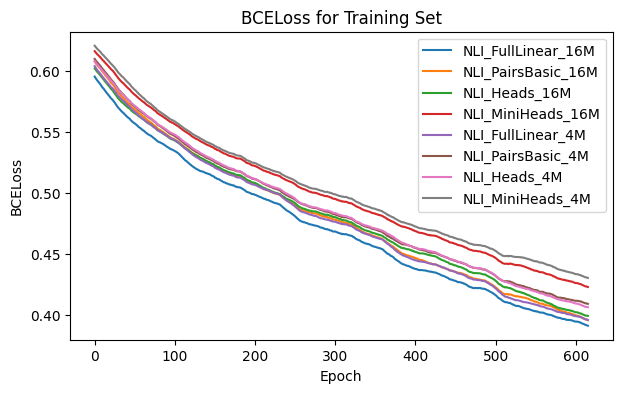

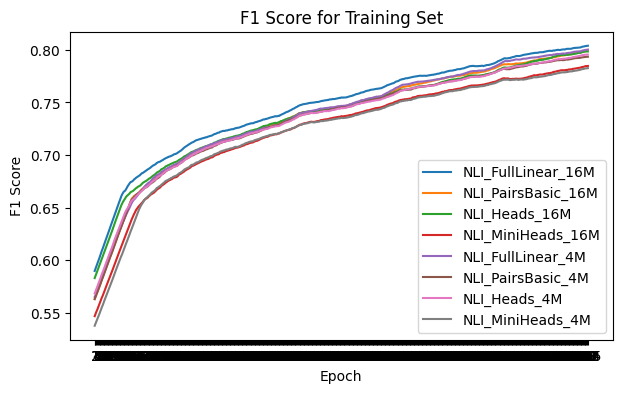

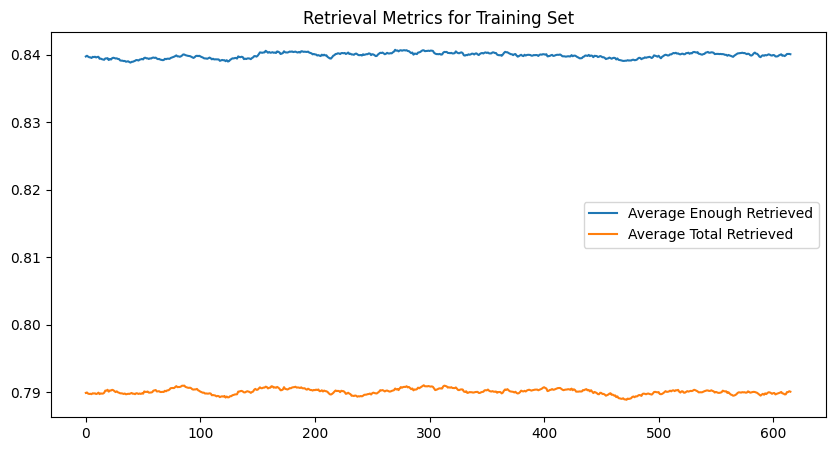

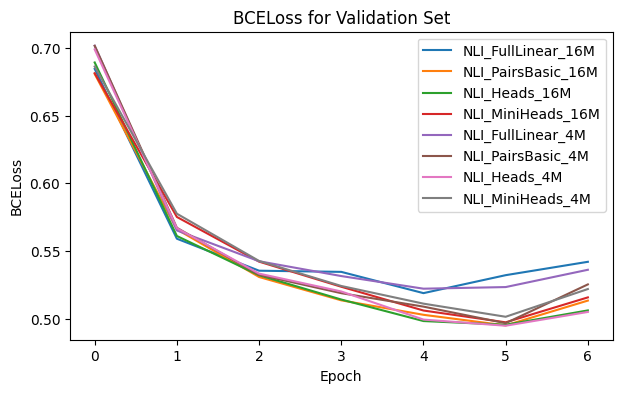

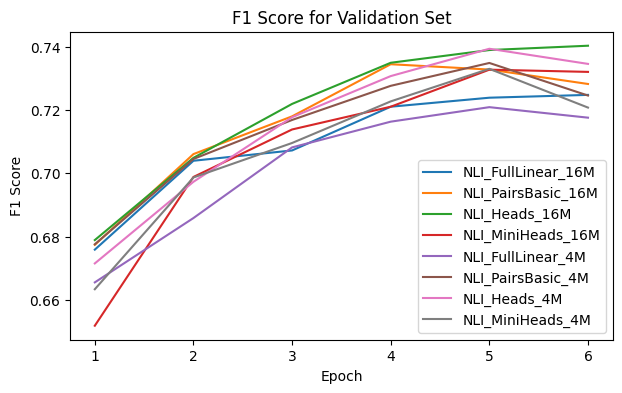

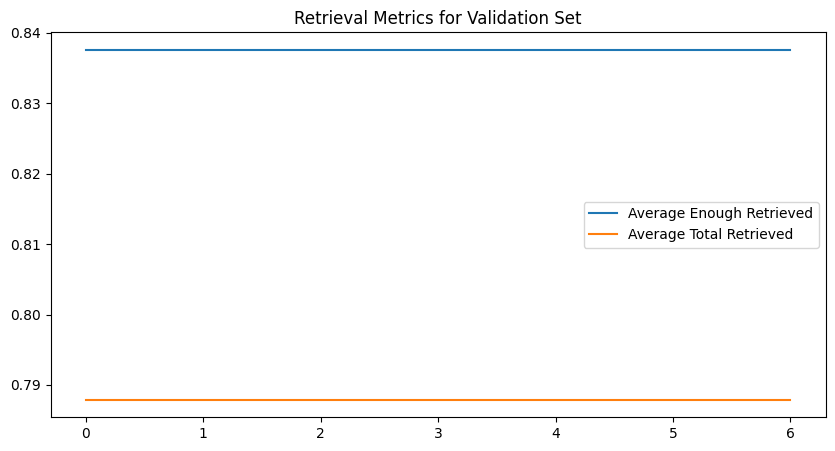

In [1]:
import json
from NLI_tests.other_utils import print_progress
# load tracking_train and tracking_eval from NLI_tests/results

with open("NLI_tests/results/tracking_train_v13_v3.json", "r") as f:
    tracking_train = json.load(f)

with open("NLI_tests/results/tracking_eval_v13_v3.json", "r") as f:
    tracking_eval = json.load(f)

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.2)

Epoch: 0
Batch: 1/1


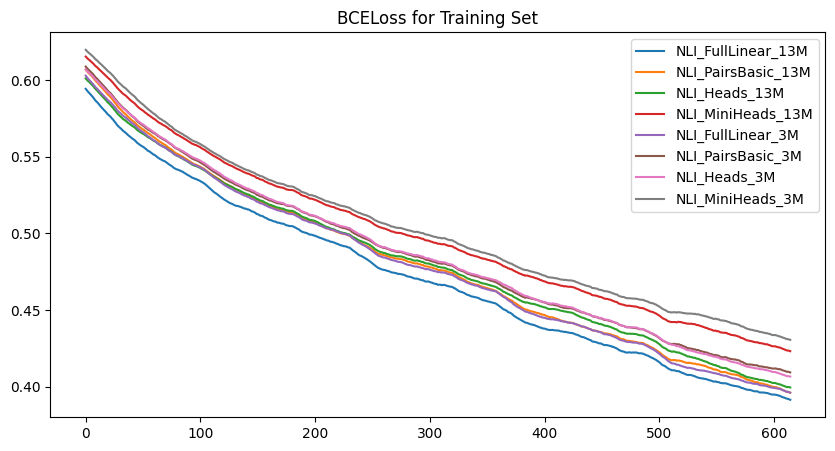

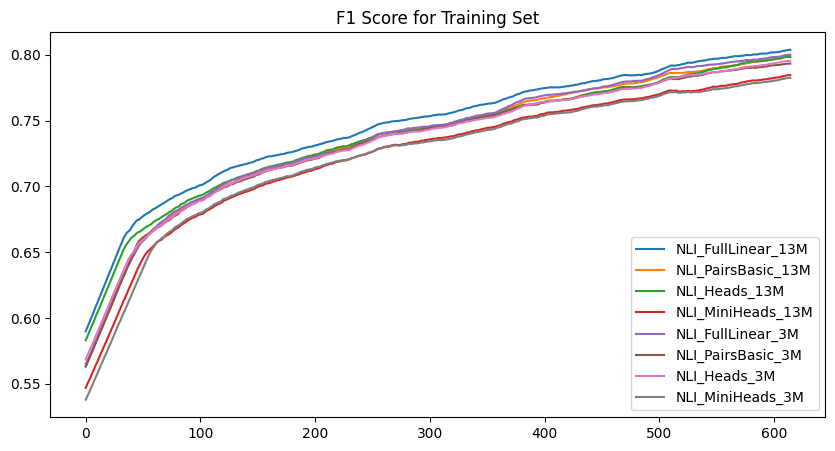

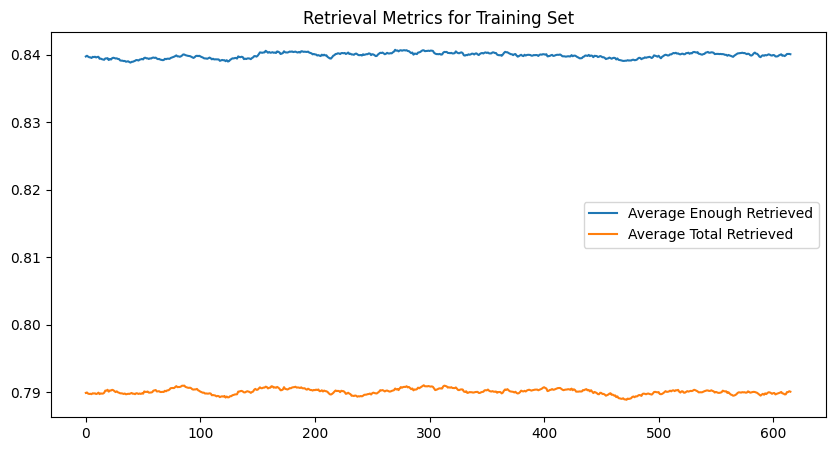

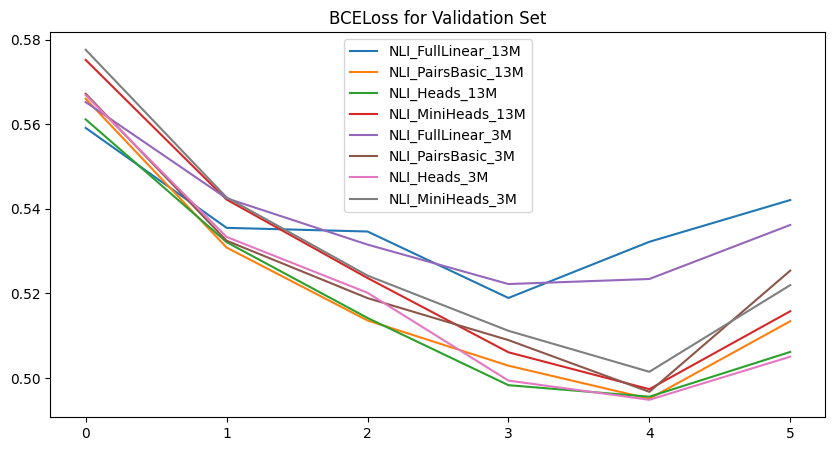

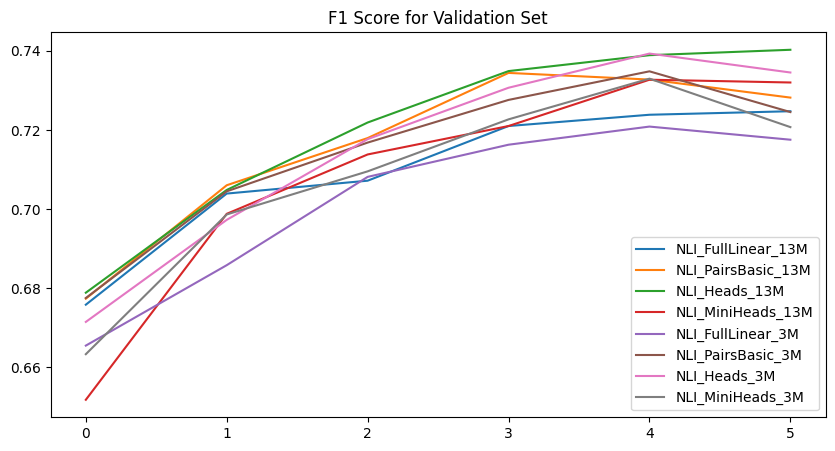

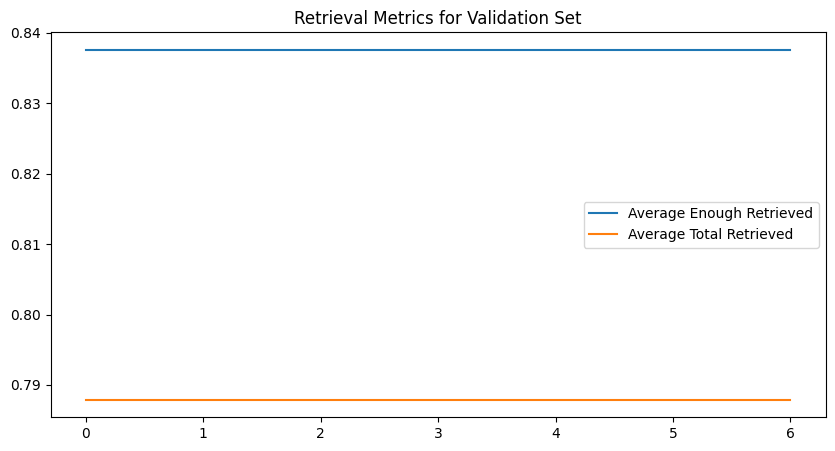

In [1]:
import json
from NLI_tests.other_utils import print_progress
# load tracking_train and tracking_eval from NLI_tests/results

with open("NLI_tests/results/tracking_train_v13_v3.json", "r") as f:
    tracking_train = json.load(f)

with open("NLI_tests/results/tracking_eval_v13_v3.json", "r") as f:
    tracking_eval = json.load(f)

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.2)

# Results Overall

Epoch: 0
Batch: 1/1


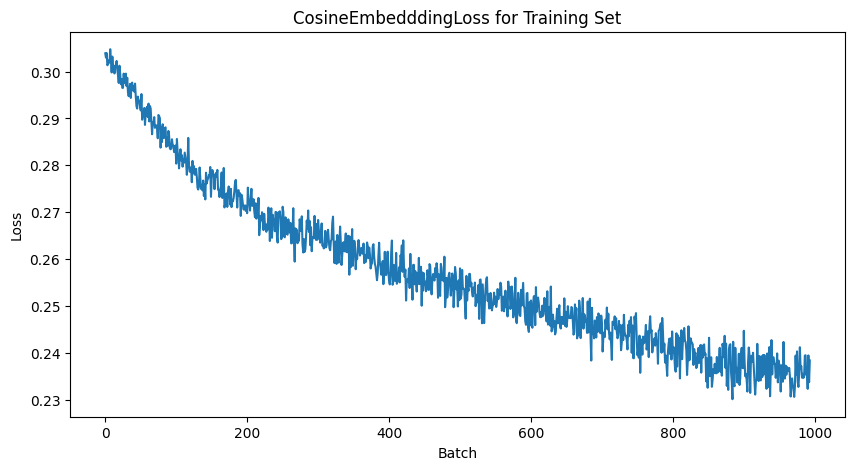

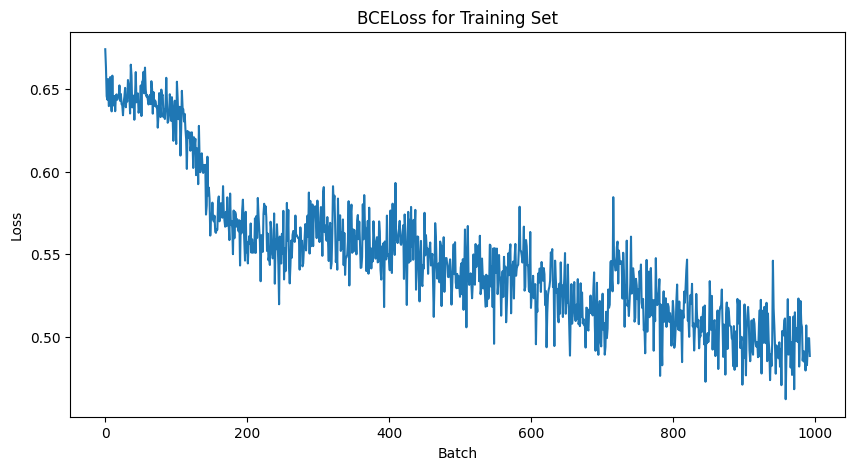

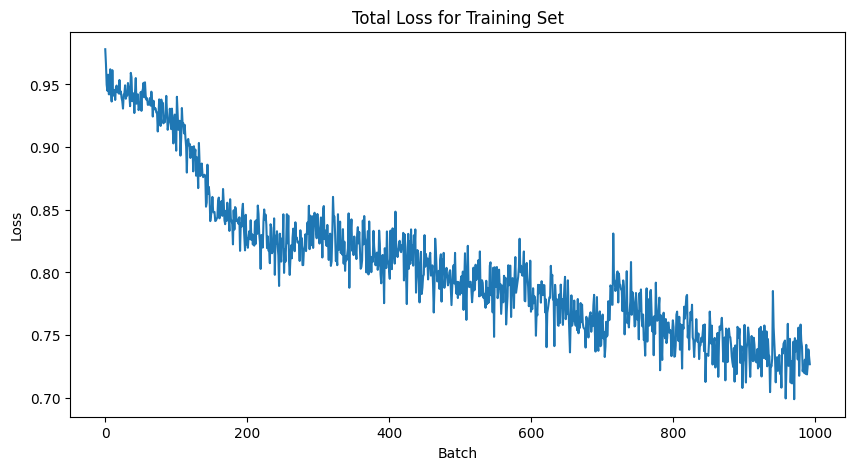

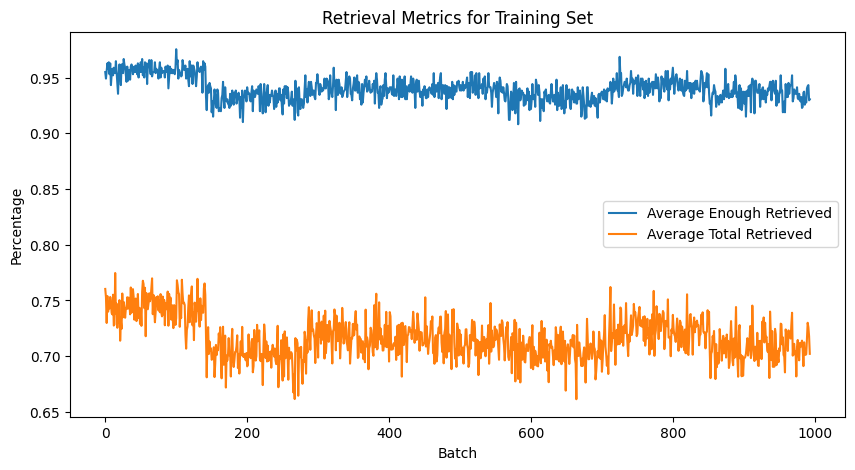

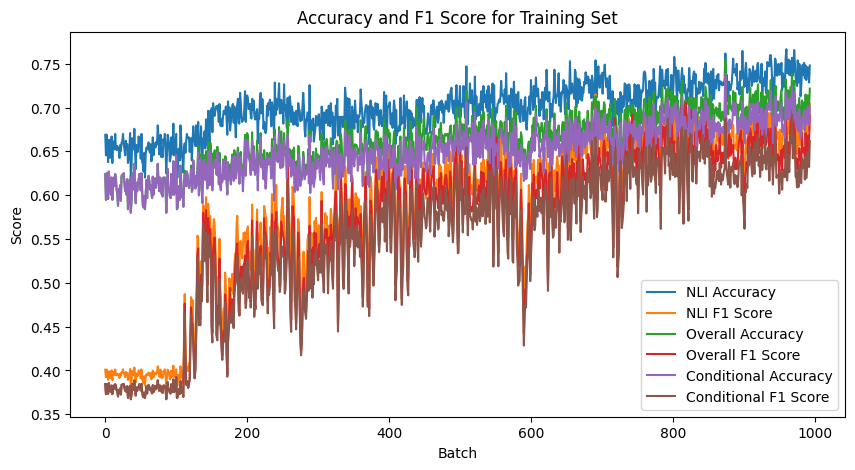

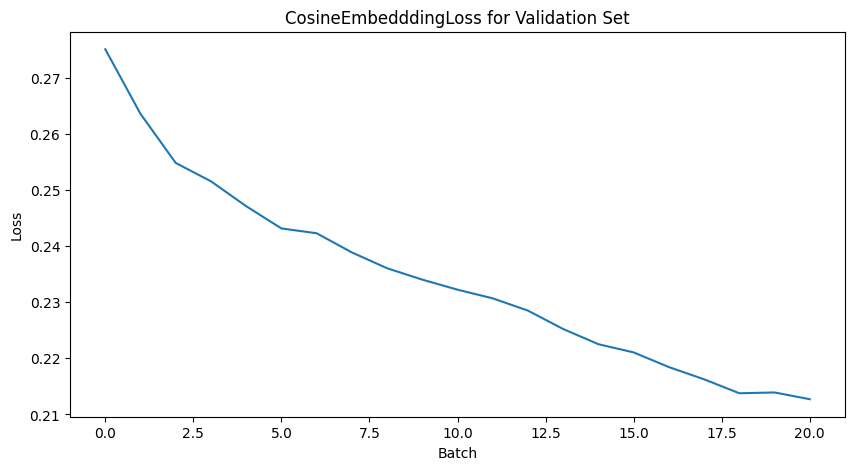

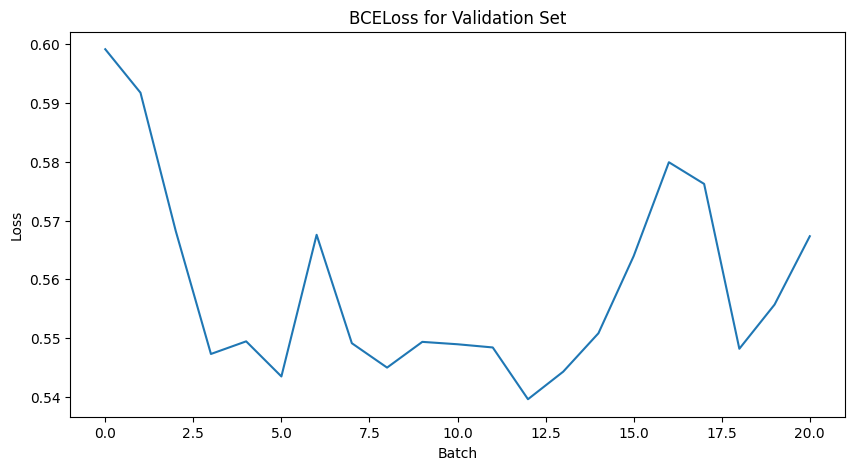

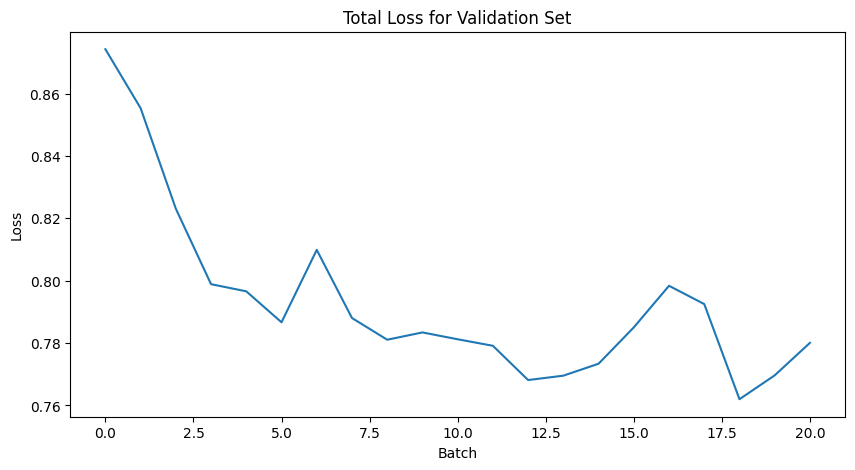

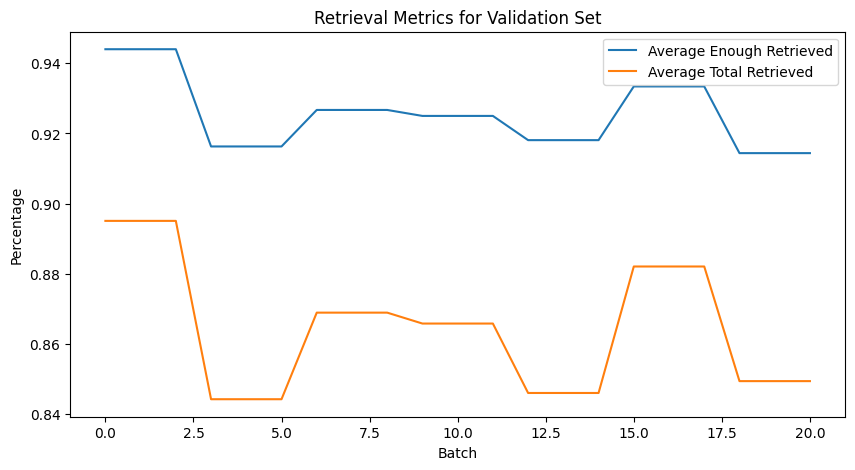

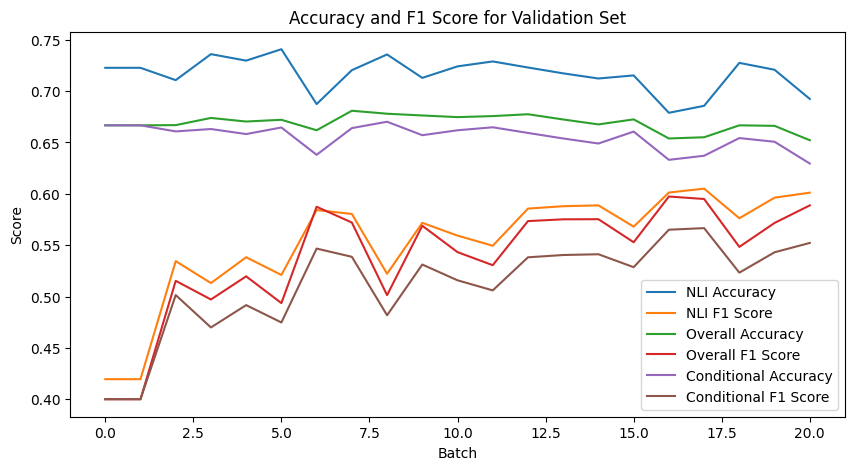

[0.6240234375, 0.5947265625, 0.625, 0.62109375, 0.595703125, 0.626953125, 0.6162109375, 0.60546875, 0.6005859375, 0.6201171875, 0.5947265625, 0.61328125, 0.6201171875, 0.6103515625, 0.6240234375, 0.6181640625, 0.6064453125, 0.6015625, 0.587890625, 0.6064453125, 0.6044921875, 0.611328125, 0.59375, 0.6220703125, 0.623046875, 0.6240234375, 0.625, 0.615234375, 0.6044921875, 0.6142578125, 0.6005859375, 0.6181640625, 0.583984375, 0.5966796875, 0.609375, 0.619140625, 0.580078125, 0.5927734375, 0.625, 0.6064453125, 0.6083984375, 0.6357421875, 0.60546875, 0.5908203125, 0.6142578125, 0.6044921875, 0.6123046875, 0.6171875, 0.6240234375, 0.6181640625, 0.60546875, 0.625, 0.6044921875, 0.587890625, 0.5859375, 0.5986328125, 0.583984375, 0.6015625, 0.6171875, 0.5966796875, 0.6171875, 0.6220703125, 0.6171875, 0.6064453125, 0.611328125, 0.6044921875, 0.5966796875, 0.62109375, 0.6005859375, 0.6142578125, 0.619140625, 0.6083984375, 0.619140625, 0.6142578125, 0.6357421875, 0.615234375, 0.6044921875, 0.6201

In [4]:
from other_utils import print_progress
import json

# load tracking_train and tracking_eval from metrics
with open("metrics/tracking_train_v2.json", "r") as f:
    tracking_train = json.load(f)

with open("metrics/tracking_eval_v2.json", "r") as f:
    tracking_eval = json.load(f)

# for tracking_train enough_retrieved and total_retrived, divide the series in 7 blocks of equal length
# and calculate their mean
l = int(len(tracking_train["average_enough_retrieved"])/6)

# tracking_train["average_enough_retrieved"] = [sum(tracking_train["average_enough_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["average_total_retrieved"] = [sum(tracking_train["average_total_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_f1"] = [sum(tracking_train["overall_f1"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_accuracy"] = [sum(tracking_train["overall_accuracy"][i*l:(i+1)*l])/l for i in range(0, 6)]

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.0)
print(tracking_train["conditional_accuracy"])